In [15]:
!pip install pandas

In [17]:
!pip install "numpy<2"

In [19]:
import pandas as pd
import numpy as np

In [21]:
import os
os.getcwd()

'C:\\Users\\jishu'

In [177]:
df= pd.read_csv("C:/Users/jishu/OneDrive/Ritu/Customer-Churn-Dataset.csv")
df.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [179]:
df = df.drop(columns=["CustomerID"])

In [181]:
print(df.columns.tolist())


['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [283]:
df = pd.read_csv("Telco_Customer_Cleaned.csv")

#  Encode Churn 
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Convert Numeric Columns ------
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(0)

# Create New Features 

# Average Monthly Spend
df['AvgMonthlySpend'] = df['TotalCharges'] / df['Tenure']
df['AvgMonthlySpend'] = df['AvgMonthlySpend'].replace([np.inf, -np.inf], 0)

# Tenure Category
df['TenureCategory'] = pd.cut(df['Tenure'],
                              bins=[0, 12, 24, 48, 72],
                              labels=['0-12 months', '13-24', '25-48', '49-72'])

# Contract Type Simplified
df['ContractType'] = df['Contract'].map({
    'Month-to-month': 'ShortTerm',
    'One year': 'MidTerm',
    'Two year': 'LongTerm'
})

#  Encode Categorical Variables 

binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling',
               'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
               'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

# One-Hot Encoding for remaining categorical columns
df = pd.get_dummies(df, columns=[
    'Gender', 'InternetService', 'PaymentMethod', 'ContractType',
    'TenureCategory'
], drop_first=True)

# Fix MultipleLines
df["MultipleLines"] = df["MultipleLines"].replace({
    "Yes": 1,
    "No": 0,
    "No phone service": 0
})

# One-hot encode Contract
df = pd.get_dummies(df, columns=["Contract"], drop_first=True)

# Confirm dataset
df.head()

C:\Users\jishu\AppData\Local\Temp\ipykernel_14040\2014233798.py:51: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["MultipleLines"] = df["MultipleLines"].replace({


,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,ContractType_MidTerm,ContractType_ShortTerm,TenureCategory_13-24,TenureCategory_25-48,TenureCategory_49-72,Contract_One year,Contract_Two year
0,0,1,0,1,0,0,0,1,0,0,...,False,True,False,False,True,False,False,False,False,False
1,0,0,0,34,1,0,1,0,1,0,...,False,False,True,True,False,False,True,False,True,False
2,0,0,0,2,1,0,1,1,0,0,...,False,False,True,False,True,False,False,False,False,False
3,0,0,0,45,0,0,1,0,1,1,...,False,False,False,True,False,False,True,False,True,False
4,0,0,0,2,1,0,0,0,0,0,...,False,True,False,False,True,False,False,False,False,False


In [285]:
df.dtypes[df.dtypes == "object"]

Series([], dtype: object)

In [295]:
missing_counts = X.isna().sum().loc[lambda x: x > 0]
print(missing_counts)



Series([], dtype: int64)


In [297]:
import pandas as pd

X_scaled_df = pd.DataFrame(X_train_scaled)

print("Any NaNs in X_train_scaled? ", X_scaled_df.isna().any().any())
print("Any inf in X_train_scaled? ", np.isinf(X_scaled_df.values).any())


Any NaNs in X_train_scaled?  True
Any inf in X_train_scaled?  False


In [299]:
col_with_nan = X_train.columns[np.where(np.isnan(X_train_scaled))[1]].unique()
print(col_with_nan)


Index(['Partner', 'SeniorCitizen'], dtype='object')


In [303]:
import pandas as pd
import numpy as np

# Identify columns with NaNs
cols_with_nan = X.columns[X.isna().any()]
print("Columns with NaNs:", cols_with_nan)


Columns with NaNs: Index([], dtype='object')


In [305]:
X[cols_with_nan] = X[cols_with_nan].fillna(0)


In [307]:
df = df.fillna(0)

In [313]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check for NaN or inf in one line
print("Any NaNs or inf in X_train_scaled:", not np.isfinite(X_train_scaled).all())


Any NaNs or inf in X_train_scaled False


Baseline Model Performance:
Accuracy: 0.7977
Precision: 0.6488
Recall: 0.5187
F1 Score: 0.5765
AUC-ROC: 0.8422

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.65      0.52      0.58       374

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



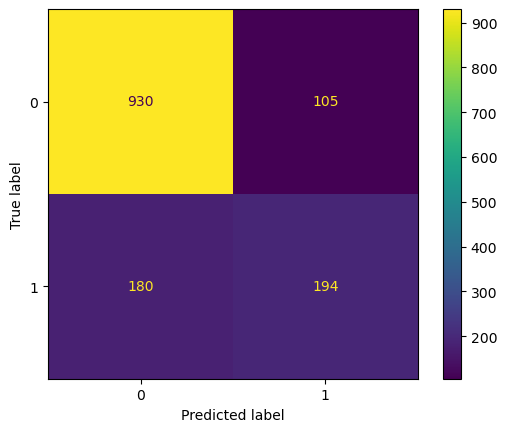

In [315]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, classification_report,
    ConfusionMatrixDisplay
)

# Create a pipeline: scaling + logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=500))
])

# Fit the model on training data
pipeline.fit(X_train, y_train)

# Predictions
y_pred = pipeline.predict(X_test)
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]

# Metrics
metrics = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1 Score": f1_score(y_test, y_pred),
    "AUC-ROC": roc_auc_score(y_test, y_pred_prob)
}

print("Baseline Model Performance:")
for k, v in metrics.items():
    print(f"{k}: {v:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
